In [45]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
fec = pd.read_csv('pydata-book/ch09/P00000001-ALL.csv')
fec.info()

/home/happyling/ProgramFile/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [3]:
# A simple record
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [7]:
# geting a list of all the unique political candidates
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [8]:
unique_cands[2]

'Obama, Barack'

In [11]:
# An easy way to indicate party affiliation is using a dict
parties = {'Bachmann, Michelle'  :'Republican',
          'Cain, Herman'         :'Republican',
          'Gingrich, Newt'       :'Republican',
          'Huntsman, Jon'        :'Republican',
          'Johnson, Gary Earl'   :'Republican',
          'McCotter, Thaddeus G' :'Republican',
          'Obama, Barack'        :'Democrat',
          'Paul, Ron'            :'Republican',
          'Pawlenty, Timothy'    :'Republican',
          'Perry, Rick'          :'Republican',
          "Roemer, Charles E. 'Buddy' III" : 'Republican',
           'Romney, Mitt'        :'Republican',
           'Santorum, Rick'      :'Republican'
          }
parties

{'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [12]:
# compute an array of political parties from the candidate names:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [13]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [16]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)
pd.value_counts(fec['party'])

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [19]:
# contributaion
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [20]:
# to simplify the analysis, I'll restrict the data set to positive contributions
fec = fec[fec.contb_receipt_amt>0]

In [25]:
# Donation Statistics by Occupation and Employer
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [29]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.' : 'CEO'
}
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec.contbr_occupation.value_counts()[:10]

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [31]:
# do the samething for employers
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)
fec.contbr_employer.value_counts()[:10]

RETIRED          206675
SELF-EMPLOYED    125164
NOT PROVIDED      58396
NOT EMPLOYED      45877
NONE              19929
HOMEMAKER         18269
REQUESTED          4233
UNEMPLOYED         2514
US ARMY            1817
STUDENT            1786
Name: contbr_employer, dtype: int64

In [43]:
# pivot_table to aggregate the data by party and occupation
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index = 'contbr_occupation',
                               columns = 'party',
                               aggfunc = 'sum')

# filter down to the subset that donated at least $2 million:
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


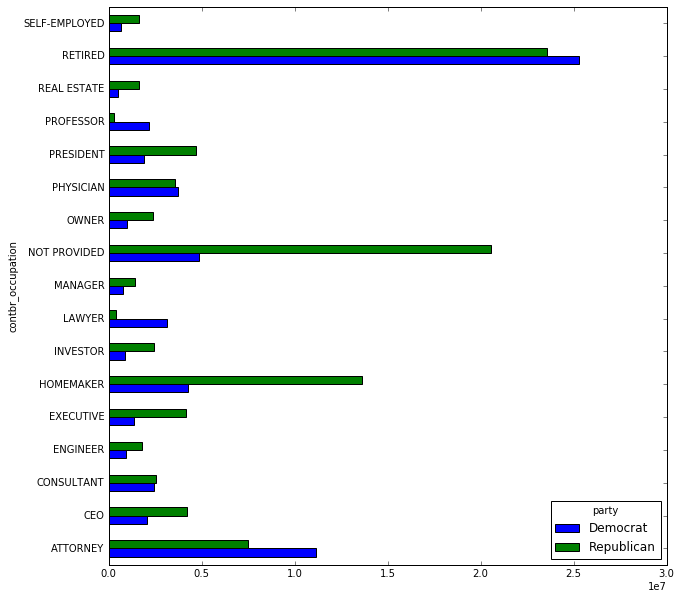

In [49]:
# it can be easier to look at this data graphically as a bar plot
over_2mm.plot(kind='barh',figsize=(10,10))

In [57]:
# if we intrested in the top donor occupations or top companies donating to Obama and Romney.

# Since Barack Obama and Mitt Romney are the main two candidates. I'll also prepare a subset that
# just has contributions to their campaigns:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

def get_top_amounts(group,key,n):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    
    #Order totals by key in descending order
    return totals.sort_values()[-n:]

# aggregated by occupation and employer
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7) # for occupation

cand_nm        contbr_occupation
Obama, Barack  CONSULTANT            2459912.71
               LAWYER                3160478.87
               PHYSICIAN             3735124.94
               HOMEMAKER             4248875.80
               NOT PROVIDED          4866973.96
               ATTORNEY             11141982.97
               RETIRED              25305116.38
Romney, Mitt   EXECUTIVE             2300947.03
               CEO                   2324297.03
               PRESIDENT             2491244.89
               ATTORNEY              5364718.82
               HOMEMAKER             8147446.22
               NOT PROVIDED         11396894.84
               RETIRED              11508473.59
Name: contb_receipt_amt, dtype: float64

In [58]:
grouped.apply(get_top_amounts,'contbr_employer',n=7) # for employer

cand_nm        contbr_employer
Obama, Barack  VOLUNTEER            257104.00
               STUDENT              318831.45
               HOMEMAKER           2605408.54
               NOT PROVIDED        5053480.37
               NOT EMPLOYED        8586308.70
               SELF-EMPLOYED      18626807.16
               RETIRED            22694358.85
Romney, Mitt   MORGAN STANLEY       267266.00
               CREDIT SUISSE        281150.00
               STUDENT              496490.94
               SELF-EMPLOYED       7414115.22
               HOMEMAKER           8147196.22
               RETIRED            11506225.71
               NOT PROVIDED       12059527.24
Name: contb_receipt_amt, dtype: float64

In [70]:
### Bucketing Donation Amounts

# A useful way to analyze this data is to use 'cut' function to discretize the contributor amounts into 
# buckets by contribution size:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
fec_mrbo['label']= pd.cut(fec_mrbo.contb_receipt_amt,bins)

/home/happyling/ProgramFile/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
grouped = fec_mrbo.groupby(['cand_nm','label'])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
label,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [75]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
label,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [77]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
label,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


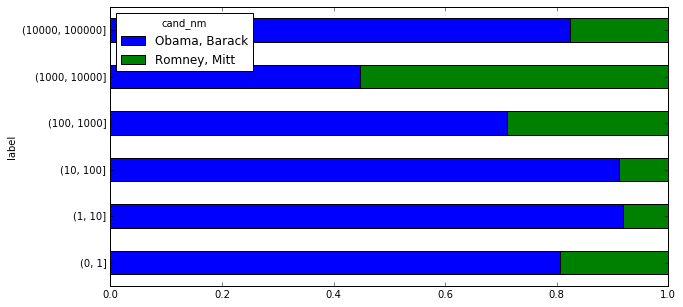

In [79]:
normed_sums[:-2].plot(kind='barh',stacked=True,figsize=(10,5))

In [83]:
##### Donation Statistics by State

grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [85]:
# get the relative percentage of total donations by state for each candidate
percent = totals.div(totals.sum(axis=1),axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [88]:
# use 'basemap' to show the result
from mpl_toolkits.basemap import Basemap,cm
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

from shapelib import ShapeFile
import dbflib


ImportError: No module named 'mpl_toolkits.basemap'